In [1]:
import numpy as np
from src._petab.CRP2_CPE.scripts import create_CRP2_CPE_conditions, create_CRP2_CPE_Model, create_CPE_Model
from src.utils.params import ParameterContainer, ParameterSet
from src.models.cpe import CPE, create_model

%load_ext autoreload
%autoreload 2

The tests rely on tellurium to construct the models
Since tellurium is not installed the tests can't be run
If you want to run the tests, pip install tellurium first


In [2]:
# Create the model
model_dir = "/PolyPESTO/src/petab/CRP2_CPE/"
model = create_CRP2_CPE_Model(model_dir=model_dir, force_compile=True)

Creating SBML model (CRP2_CPE).
Creating CRP parameters.
                 filename : /PolyPESTO/src/petab/CRP2_CPE/CRP2_CPE.xml
         file size (byte) : 14278
           read time (ms) : 2.873182
        c-check time (ms) : 0.782490
      validation error(s) : 0
    (consistency error(s)): 0
    validation warning(s) : 0
  (consistency warning(s)): 0
Cleaning existing directory: /PolyPESTO/amici_models/CRP2_CPE
Compiling AMICI model from SBML.


In [7]:
# Create the model
model_dir = "/PolyPESTO/src/petab/CRP2_CPE/"
# model = create_CRP2_CPE_Model(model_dir=model_dir, force_compile=False)
model = create_CPE_Model()

# ps = ParameterSet.from_dict({
#         "id": "slow_kinetics",
#         "parameters": {
#             "k1": {"id": "k1", "value": 0.1},
#             "k2": {"id": "k2", "value": 0.2},
#         }
#     })

# model.set_params(ps)
# print(model.name)

# Define a set of parameters to sweep (e.g. irreversible params, all params, base set of params, extended set, etc.)
pc = ParameterContainer.from_json("/PolyPESTO/src/data/parameters/CRP2_CPE.json")
pg = pc.get_parameter_group("IRREVERSIBLE")

# Define a set of conditions to generate synthetic data
t_eval = list(np.arange(0, 1, 0.1, dtype=float))
fA0s = np.array([0.25, 0.5, 0.75, 0.1], dtype=float)
cM0s = np.array([1.0, 1.0, 1.0, 1.0], dtype=float)
cond_df = create_CRP2_CPE_conditions(fA0s, cM0s)

# Generate and save the dataset
ds_name = "ds_0"
ds_dir = f"/PolyPESTO/src/data/datasets/CRP2_CPE/{ds_name}"

ds = model.generate_dataset(
    param_group=pg, t_eval=t_eval, cond_df=cond_df, name=ds_name
).write(ds_dir)
ds

PetabDataset(name='ds_0', obs_df=             observableFormula  noiseFormula
observableId                                
obs_xA                      xA          0.02
obs_xB                      xB          0.02, cond_df=               A0    B0 conditionName
conditionId                          
c_0          0.25  0.75           c_0
c_1          0.50  0.50           c_1
c_2          0.75  0.25           c_2
c_3          0.10  0.90           c_3, param_group=ParameterGroup(id='IRREVERSIBLE', parameter_sets={'p1': ParameterSet(id='p1', parameters={'rA': Parameter(id='rA', value=2.0), 'rB': Parameter(id='rB', value=2.0), 'rX': Parameter(id='rX', value=2.0), 'KAA': Parameter(id='KAA', value=0.0), 'KAB': Parameter(id='KAB', value=0.0), 'KBA': Parameter(id='KBA', value=0.0), 'KBB': Parameter(id='KBB', value=0.0)}), 'p2': ParameterSet(id='p2', parameters={'rA': Parameter(id='rA', value=3.0), 'rB': Parameter(id='rB', value=3.0), 'rX': Parameter(id='rX', value=3.0), 'KAA': Parameter(id='KAA', 

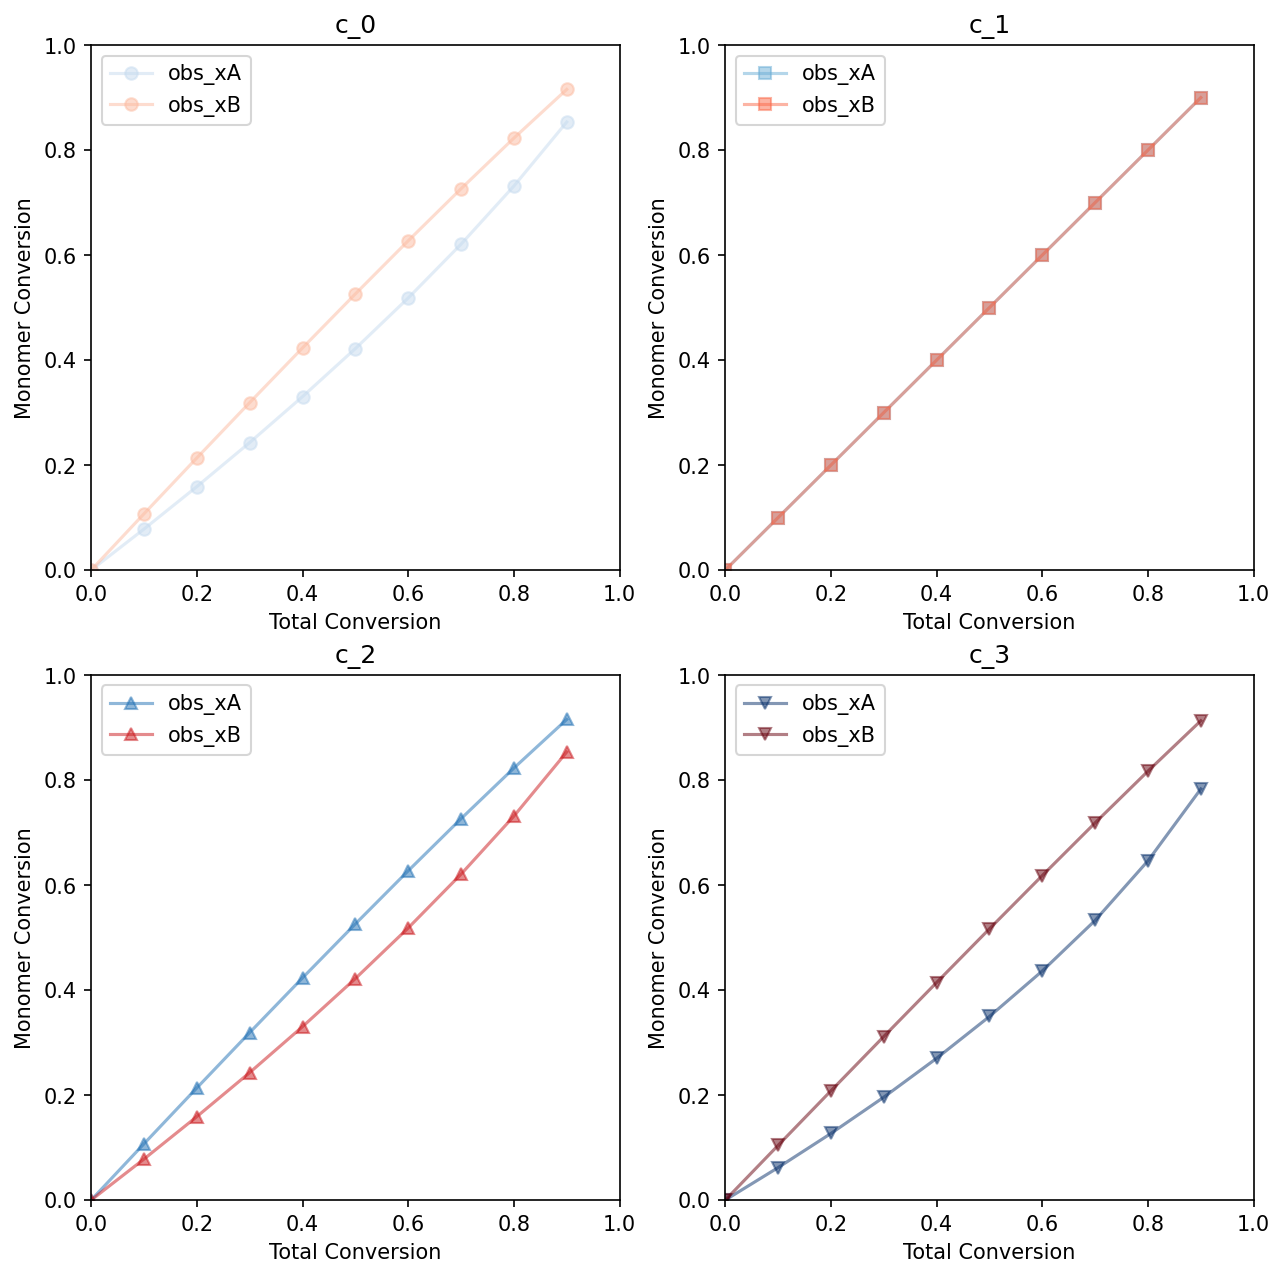

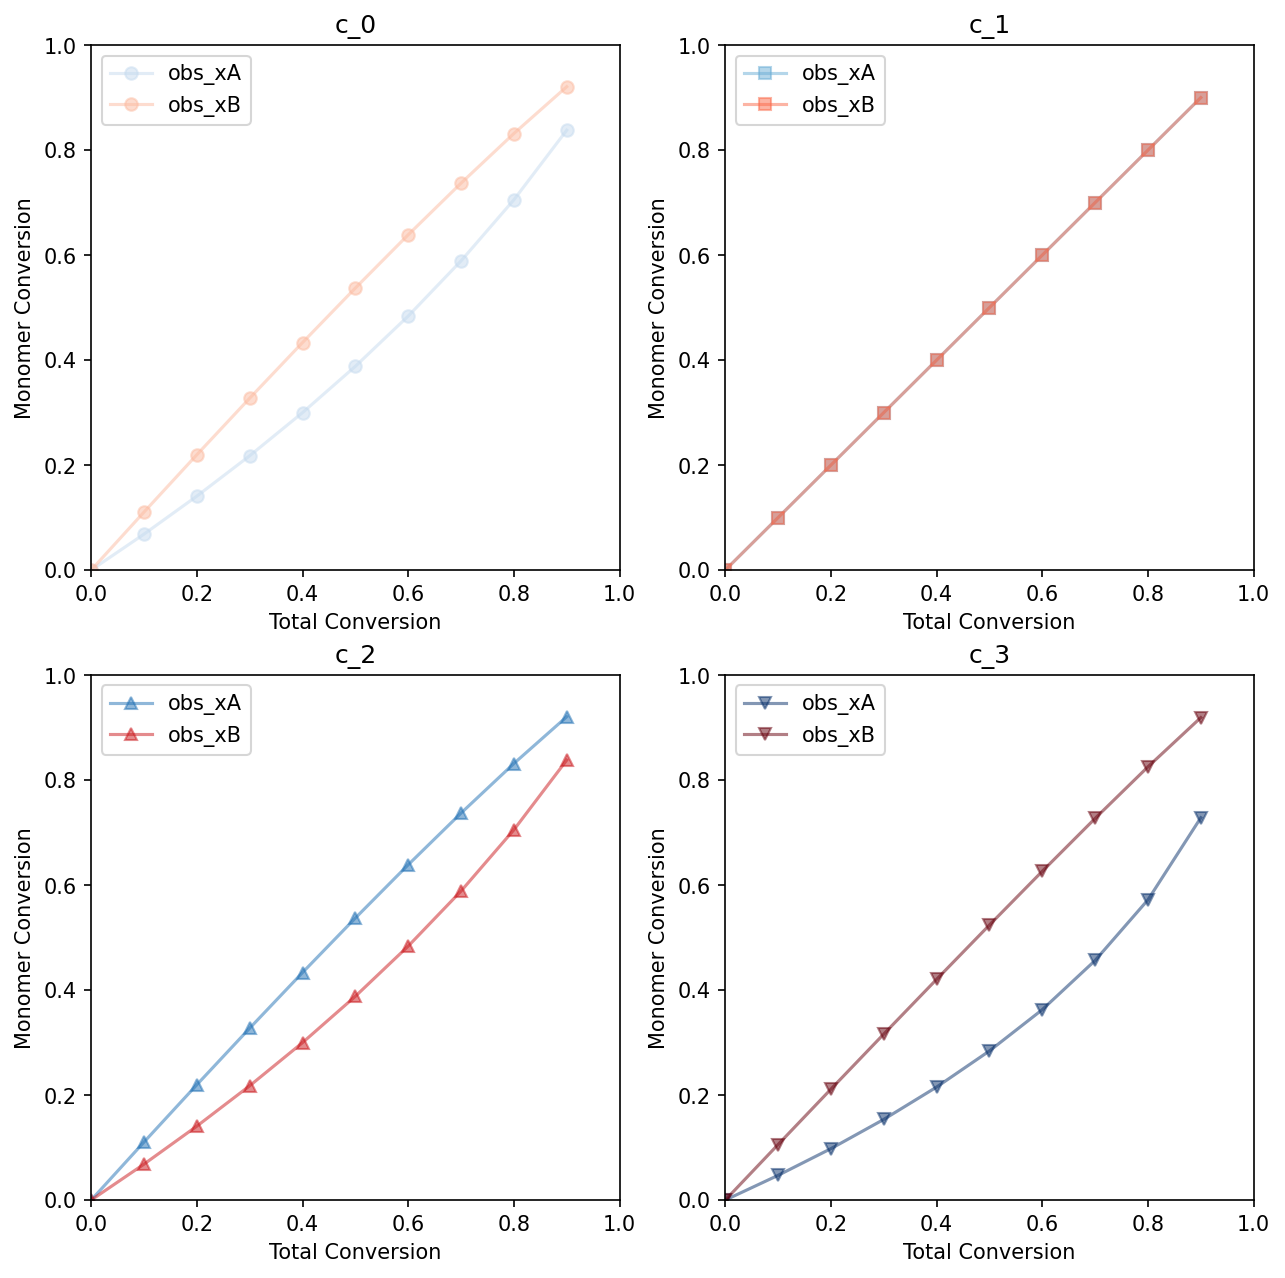

In [6]:
from src.utils.plot import plot_all_measurements
from matplotlib import pyplot as plt
import petab.v1.C as C

for id, df in ds.meas_dfs.items():
    plot_all_measurements(df, 
        group_by=C.SIMULATION_CONDITION_ID,
        # group_by=C.OBSERVABLE_ID,
        format_axes_kwargs={
            "set_xlabel": "Total Conversion", 
            "set_ylabel": "Monomer Conversion",
            "set_xlim": (0, 1),
            "set_ylim": (0, 1),
        },
        plot_style="both",
        alpha=0.5,
    )
    plt.show()